# **Análisis exploratorio y estadística**
# AE14 - Introducción a conceptos de correlación


En este notebook  utilizaremos principalmente le dataset del Titanic para  reforzar las visualizaciones desarrolladas en los notebook anteriores, e introducir el conceptos de correlación.


Como punto de partida importaremos nuestras 4 librerías.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='blue'>**Leyendo los datos**</font>

El código está adaptado para poder leer desde google drive, sin embargo, se puede modificar la ruta si es que se quiere trabajar en forma local.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ANÁLISIS EXPLORATORIO Y ESTADÍSTICA_3ra_Unidad/'

trainFile = 'titanic_train.csv'

In [ ]:
train_df = pd.read_csv(path + trainFile)


## <font color='blue'>**Nuestra estadística descriptiva**</font>

La siguiente, es el diccionario de datos del archivo:

1. Survival: Sobreviviente		0 = No, 1 = Si
2. Pclass: La clase del ticket	1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex:	Sexo
4. Age: Edad en años
5. Sibsp:	Número de hermanas / cónyuges a bordo del Titanic
6. Parch:	Número de padres / hijos a bordo del Titanic
7. Ticket:	Número del ticket
8. Fare:	Tarifa de pasajero
9. Cabin: Número de cabina
10. Embarked: Puerto de embarque	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000,257.354,1.00,223.500,446.000,668.5,891.000
Survived,891.0,0.384,0.487,0.00,0.000,0.000,1.0,1.000
Pclass,891.0,2.309,0.836,1.00,2.000,3.000,3.0,3.000
Age,714.0,29.699,14.526,0.42,20.125,28.000,38.0,80.000
SibSp,891.0,0.523,1.103,0.00,0.000,0.000,1.0,8.000
Parch,891.0,0.382,0.806,0.00,0.000,0.000,0.0,6.000
Fare,891.0,32.204,49.693,0.00,7.910,14.454,31.0,512.329


Qué puede decir de los distintos atributos? Cómo es la media y la mediana? Existe mucha diferencia entre ellas en algunas variables, por ejemplo **Survived**? Qué significa eso?

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color='blue'>**Análisis categórico**</font>

Analicemos la variable __Survival__.

In [ ]:
c_palette = ['tab:blue', 'tab:orange']
#c_palette = ['tab:blue', 'tab:orange','tab:green']

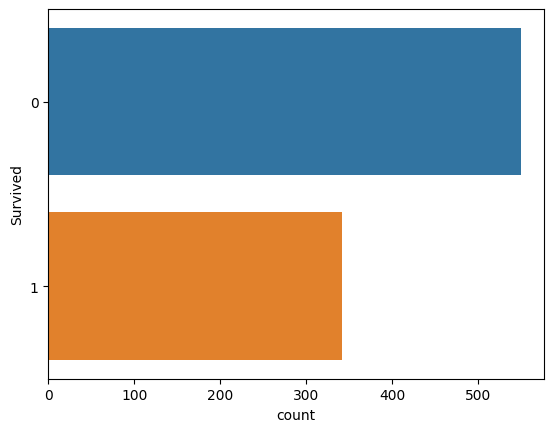

In [ ]:
sns.countplot(y='Survived', data=train_df, palette=c_palette)
#sns.countplot(y='Pclass', data=train_df, palette=c_palette)
plt.show()

Analicemos la variable __Sex__, pero agregando la codición de si sobrevició o no. Sobrevivientes por sexo:

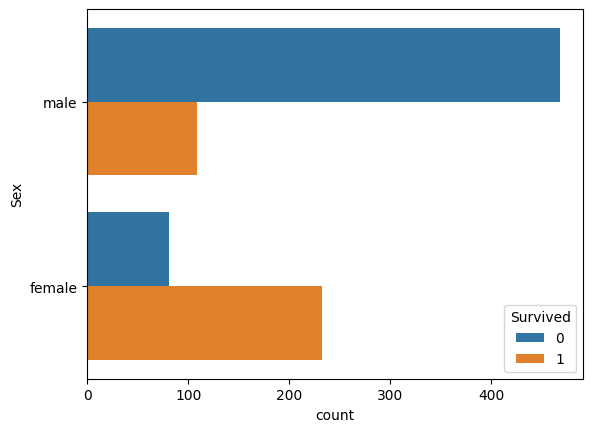

In [ ]:
sns.countplot(y='Sex',hue='Survived', data=train_df, palette=c_palette)
plt.show()

En proporción sobrevivieron más mujeres que hombres. Sin embargo, es interesante explorar si esto se mantuvo bajo otras condiciones como por ejemplo donde embarcó o la clase en la que viajaba el pasajero.

### <font color='green'>**Actividad 1**</font>

Realice el mismo ejercicio anterior pero considere la variable **Embarked** y **Pclass**, siga diferenciando la visualización por la variable __Survived__.

Qué conclusión puede generar?

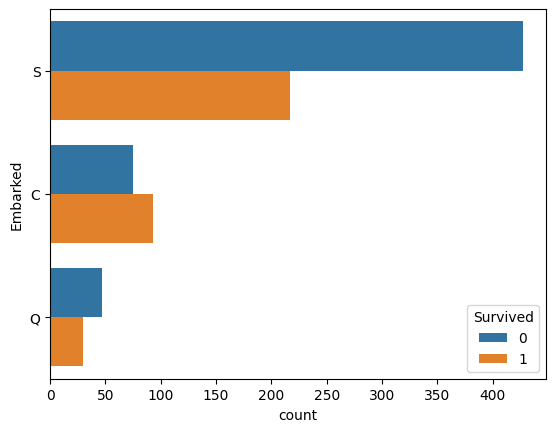

In [ ]:
# Tu código aquí ...
sns.countplot(y='Embarked',hue='Survived', data=train_df, palette=c_palette)
plt.show()

**Conclusión variable Embarked (Valores Puerto de embarque C = Cherbourg, Q = Queenstown, S = Southampton):**

> Los pasajeros de Southampton, tenían mas probabilidad de morir.
> Mientras que  para los pasajeros de Cherbourg proporcionalmente su tasa sobrevivencia fue mayor.



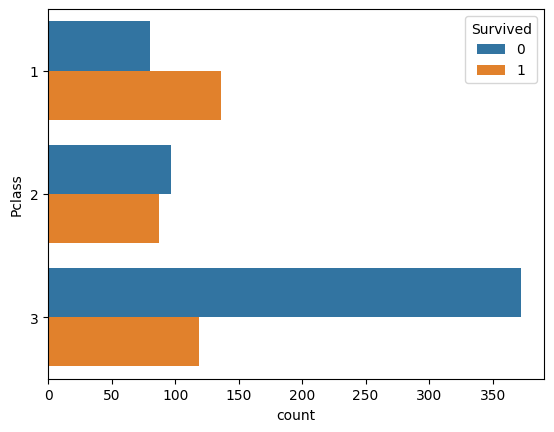

In [ ]:
# Variable Pclass
sns.countplot(y='Pclass',hue='Survived', data=train_df, palette=c_palette)
plt.show()

**Conclusión variable Pclass:**

> Los pasajeros de tercera clase, tenían mas probabilidad de morir.
> Mientras que  para los pasajeros de primera proporcionalmente su tasa sobrevivencia fue mayor.


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Análisis cuantitativo**</font>

Analicemos la variable __Age__.

In [ ]:
c_palette = ['tab:blue', 'tab:orange']
c_palette3 = ['tab:blue', 'tab:orange','tab:green']

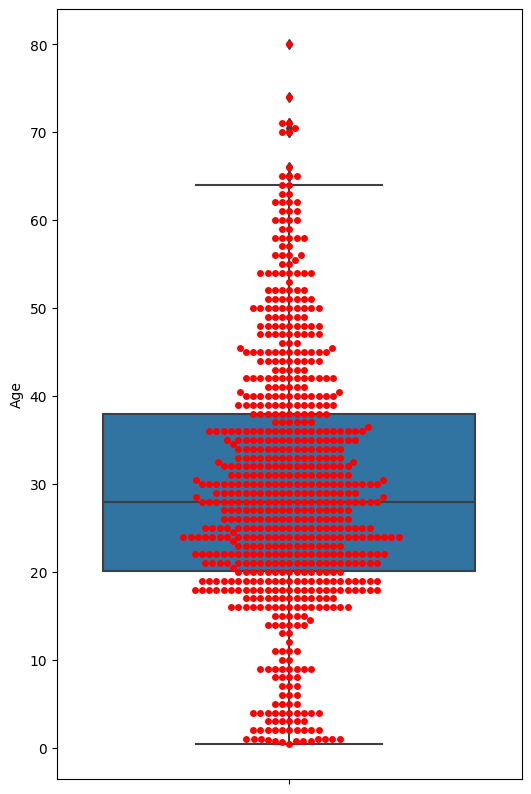

In [ ]:
# Analisis univariado.
plt.figure(figsize=(6,10)) # Agrandamos la figura para hacerla más clara
sns.boxplot(y='Age', data=train_df, palette=c_palette)
sns.swarmplot(y='Age', data=train_df, color='r')
plt.show()

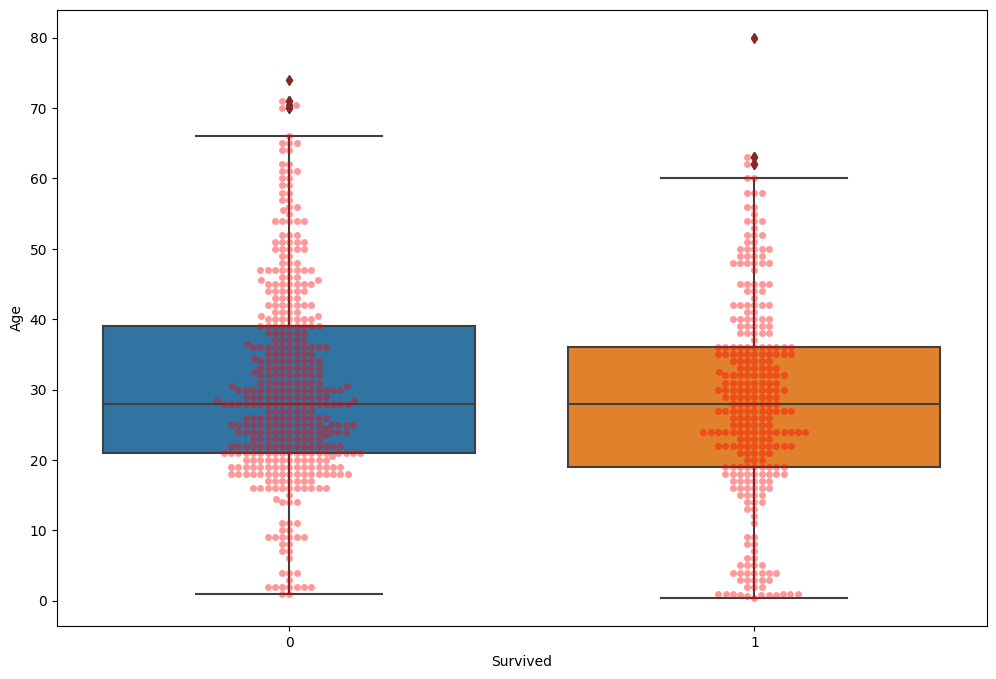

In [ ]:
# Exploremos la edad pero considerando adicionalmente Survived
plt.figure(figsize=(12, 8)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y='Age', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.swarmplot(x='Survived', y='Age', data=train_df, color='r', alpha=0.4)
plt.show()

Visualmente no se observa que existió una diferencia marcada por la edad entre los sobrevivientes y los que no.

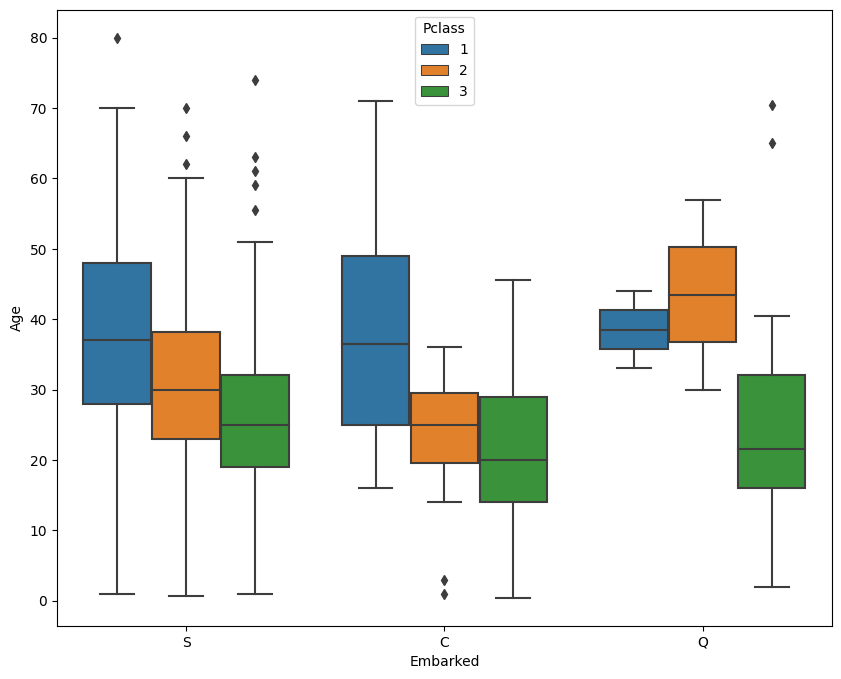

In [ ]:
# Incoproremos la clase y el embarque para ver si existe relación entre la edad y estas variables.
plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Pclass',
            data=train_df, palette=c_palette3)
plt.show()

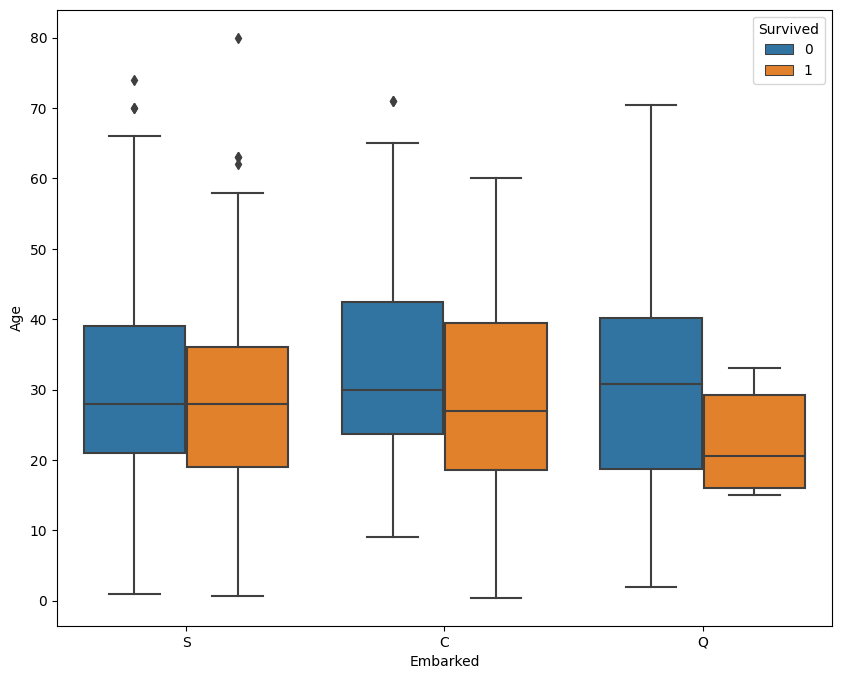

In [ ]:
# Analicemos la relación entre Embarked, Age y Survived.

plt.figure(figsize=(10, 8))
sns.boxplot(x='Embarked', y='Age', hue='Survived',
            data=train_df, palette=c_palette)
plt.show()

### <font color='green'>**Actividad 2**</font>

1. Compare a través de un `boxplot` cómo es la dependencia entre la variable __Parch__, que representa el número de padres o hijos que viajaban, respecto de si sobrevivió o no.
2. Realice el mismo análisis para __SibSp__.

Incorpore también un _swarmplot_ para entender la cantidad de puntos relacionados.

Qué conclusión puede generar?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


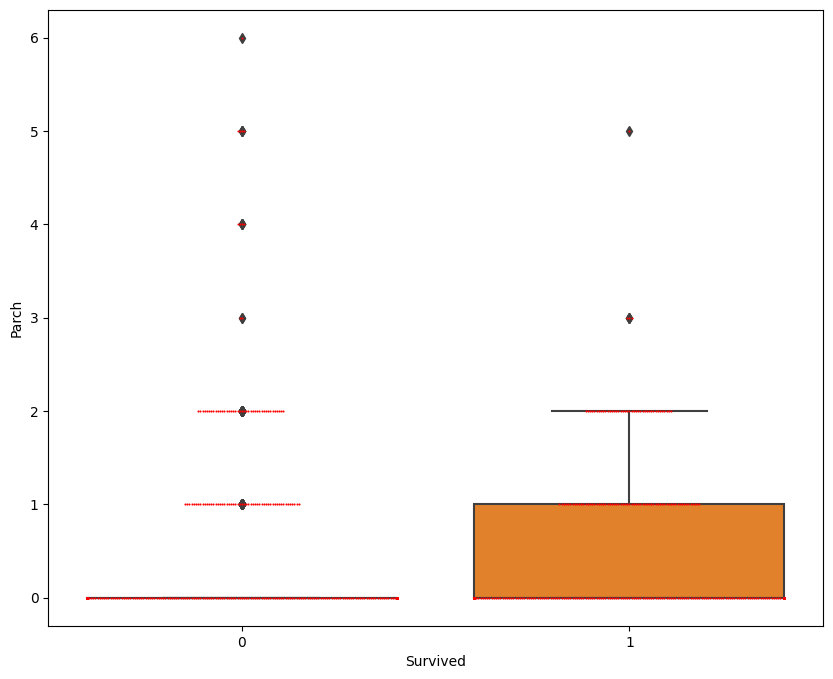

In [ ]:
# Tu código aquí ...
# Pregunta 1. # Parent Child (Parch)
plt.figure(figsize=(10, 8)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y='Parch', data=train_df, palette=c_palette) #
sns.swarmplot(x='Survived', y='Parch', data=train_df, color='r',size=1.5)
#sns.stripplot(x='cyl', y='hp', data=df_cars, jitter=True, size=1.5)
plt.show()

**Conclusión variable Parch:**

Aquellos pasajeros que tenian al menos un hijo o padre tenian mas probabilidad de sobrevivir, caso contrario en los que tenían esta condición cuyos casos era mayormente aislados.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


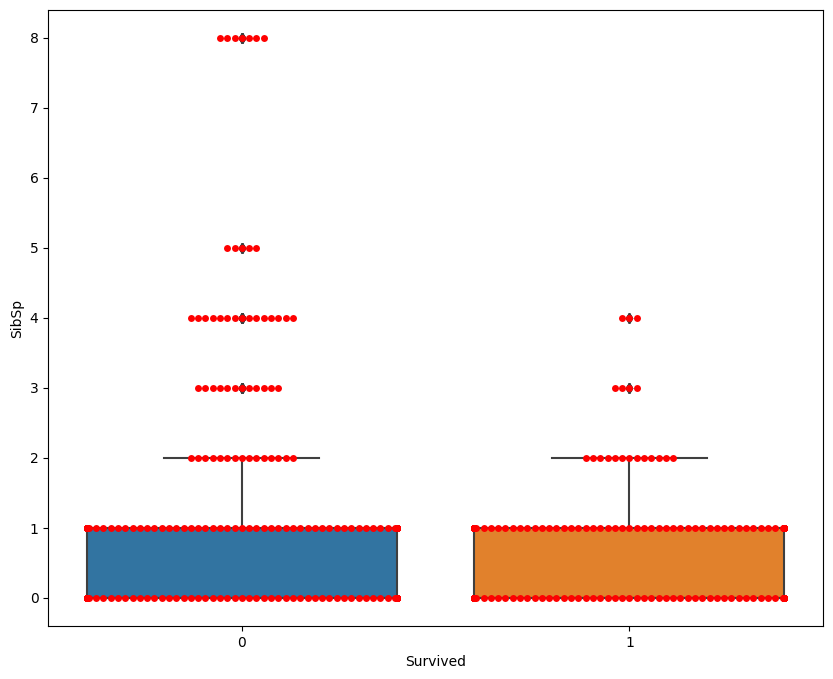

In [ ]:
# Pregunta 2. Siblings Spouse (SibSp)
plt.figure(figsize=(10, 8)) # Agrandamos la figura para hacerla más clara
sns.boxplot(x='Survived', y=' ', data=train_df, palette=c_palette) # probar con boxprops=dict(alpha=.5)
sns.swarmplot(x='Survived', y='SibSp', data=train_df, color='r')
plt.show()

**Conclusión variable SibSp:**
 En caso de aquellos pasajeros que no sobrevivieron, hay muchos casos de numero de hermanos igual o mayor que 2, esta condición de outliers disminuye en el caso de los que sobrevivieron, concluyendo que esta condición influyó en la tasa de sobrevivencia.

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Análisis de correlación**</font>

###__¿Qué es la correlación?__<br>
La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

### __¿Cómo se mide la correlación?__<br>
Describimos la correlación mediante una __medida sin unidades__ llamada __coeficiente de correlación__, que va desde -1 a +1 y se indica mediante las letras $r$ o $\rho$ (para muestras o poblaciones respectivamente); este coeficiente cuantifica la intensidad de la relación. La significancia estadística se indica mediante un valor p. Por tanto, usualmente las correlaciones se escriben con dos números clave: $r$ y $p$.
Existen varios estadísticos desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son __Pearson__, __Spearman__ y __Kendall__.

* Cuanto más se aproxima $r$ a cero, más débil es la relación lineal.
* Los valores de $r$ positivos indican una correlación positiva, en la que los valores de ambas variables tienden a incrementarse juntos.
* Los valores de $r$ negativos indican una correlación negativa, en la que los valores de una variable tienden a incrementarse mientras que los valores de la otra variable descienden.
El valor $p$ aporta evidencia de que podemos concluir de manera significativa que es probable que el coeficiente de correlación de la población sea diferente a cero, basándonos en lo que hemos observado en la muestra.
* El que sea una "medida sin unidades" significa que la correlación tiene su propia escala: en nuestro ejemplo, el número de $r$ no está en la misma escala que la altura ni que la temperatura. Esto es diferente a otros estadísticos de resumen. Por ejemplo, la media de las medidas de altura está en la misma escala que su variable.

__¿Cuáles son algunas limitaciones del análisis de correlación?__<br>
La correlación no puede medir la presencia o el efecto de otras variables aparte de las dos que se están explorando. Es importante saber que la correlación no nos informa sobre causas y efectos. Además, la correlación no puede describir con precisión las relaciones curvilíneas.

### __Covarianza__
Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la __covarianza__, que mide el grado de variación conjunta de dos variables aleatorias.

<br><br>
$$
\text{Covarianza}\: \text{muestral} = Cov(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})} {N-1}$$
<br>
donde  $\bar{x}$  e  $\bar{y}$  son la media de cada variable, y $x_i$  e $y_i$  son los valores de las variables para la observación $i$ .


<br>
En la siguiente imagen vemos varios grupos de puntos $(x,y)$, con el coeficiente de correlación para cada grupo. Nótese que la correlación refleja la no linealidad y la dirección de la relación lineal. En la figura del centro, la varianza de $y$ es nula, por lo que la correlación es indeterminada.

<img src="https://drive.google.com/uc?export=view&id=1THxrficSNSUI3xx5U7nNdtKVZZv0zZBC" width='600'><br>
Image: Denis Boigelot

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación, y poder hacer comparaciones, consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación.


### __Significancia estadística__

Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia estadística. Por muy cercano que sea el valor del coeficiente de correlación a  +1  o  −1 , si no es significativo, no se dispone de evidencias suficiente para afirmar que existe una correlación real, ya que el valor observado podría deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el t-test. Donde el estadístico t se obtiene acorde a la ecuación:
$$
t = \frac{r \sqrt{N - 2}} {\sqrt{1 - r^2}}
$$

donde, $r$ es el valor del coeficiente de correlación y $N = n_x + n_y$ es el número de observaciones disponibles de ambas variables. Los grados de libertad se calculan como  $df𝑓 = 𝑁 − 2$ (un grado de libertad menos por cada variable.

En este test, se considera como hipótesis nula ($H_0$ ) que las variables son independientes (coeficiente de correlación poblacional = 0), y como hipótesis alternativa ($H_1$), que sí existe relación (coeficiente de correlación poblacional $\ne$ 0).

### __Tamaño de efecto__

La correlación lineal, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado conocido como coeficiente de determinación $R^2$.

$R^2$  se interpreta como la cantidad de varianza de $Y$  explicada por $X$. En el caso del coeficiente de Pearson y el de Spearman, $R^2$  se obtiene elevando al cuadrado el coeficiente de correlación. En el caso de Kendall no se puede calcular de este modo.


### **Correlacion de Pearson**
La correlación de Pearson mide la relación lineal entre dos variables en base a la covarianza estandarizada. La definicion forma es:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$


La anterior ecuación se corresponde con el coeficiente de Pearson poblacional ($\rho$ ). En la práctica, raramente se tiene acceso a toda la población, por lo que su valor se estima a partir de una muestra mediante el coeficiente de Pearson muestral ($r$): <br><br>

$$
r_{x,y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

__Condiciones__

Las condiciones que se deben de cumplir para que el coeficiente de correlación de Pearson sea válido son:

* La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

* Las dos variables deben de ser numéricas.

* Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

* Homocedasticidad: la varianza de  $Y$ debe ser constante a lo largo de la variable  $X$. Esto se puede contrastar si en un scatterplot los valores de  $Y$  mantienen la misma dispersión en las distintas zonas de la variable  $X$ .

Veamos la correlación de las variables en el caso del dataset del Titanic.

In [ ]:
# Eliminamos las variables categoricas
corr_df = train_df.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
corr_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# Hay NaN, los rellenamos con la moda
corr_df['Age'] = corr_df['Age'].fillna(value=corr_df['Age'].mode()[0])
corr_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

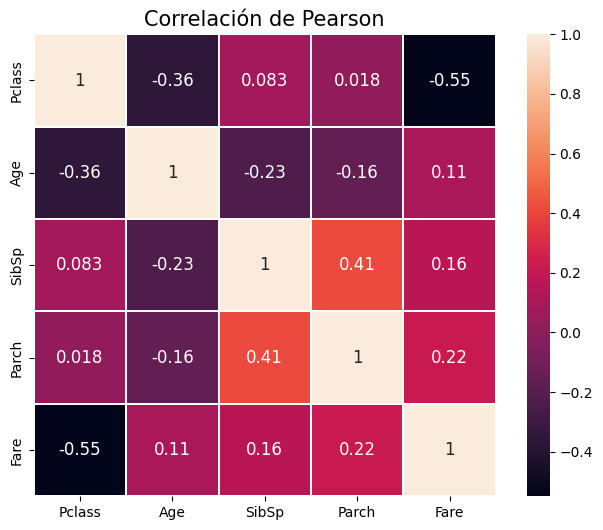

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Correlación de Pearson', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(corr_df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

Considere la siguiente escala:

|Valor|Fuerza de la asociación|
|:---:|:----------------------|
|0    |Asociación nula        |
|0.1  |Asociación pequeña     |
|0.3  |Asociación mediana     |
|0.5  |Asociación moderada    |
|0.7  |Asociación alta        |
|0.9  |Asociación muy alta    |

Qué relación interesante aparece?<br>
Qué tipo relación hay entre las variables?<br>
Cuál de ellas tienen las correlaciones positivas o negativas más altas?

## <font color='purple'>__REFLEXIÓN GRUPAL__:<br>

Hoy en día nos encontramos en una revolución de datos que está transformando el mundo de una forma tan violenta y rápida que es muy difícil predecir los cambios que se vienen incluso en el futuro cercano. Los datos se han convertido en un recurso invaluable, donde empresas, gobiernos y organizaciones de todo tipo están recolectando, almacenando y analizando cantidades masivas de datos a una velocidad sin precedentes.

En este módulo ya empezamos a profundizar en el aprendizaje de la Ciencia de Datos a partir el Análisis Exploratorio de datos y Conceptos de Estadística utilizando el lenguaje de programación Python. Estos conocimientos nos permiten enfrentarnos de forma más completa y metódica a los diferentes desafíos que podremos encontrarnos en nuestros campos laborales y de estudio.

Además que nos prepararon para los siguientes pasos del curso, los cuales constan de herramientas más potentes como lo serán los siguientes módulos de Aprendizaje Supervisado y No Supervisado o de Deep Learning.
Este módulo nos entregó las bases para poder visualizar y explorar datos de diversas fuentes con diferentes, además de introducir a conceptos estadísticos para entender los datos a los que nos enfretamos y queremos obtener información. En el módulo vimos tópicos que nos permitieron:

-Presentarnos y utilizar las librerías Matplotlib y Seaborn para visualizar y contruir gráficos y representaciones de diferentes tipos de datos y variables. Vimos que las capacidades de Matplotlib son muy potentes para representar, caracterizar y desarrollar visualizaciones. Mientras que Seaborn nos ofrece un código más conciso y legible para representar la mayoría de visualizaciones que necesitaremos desarrollar en una exploración común de datos. Sus Notebooks nos permitieron aprender de ambos para aplicar la mejor solución al problema al que nos veamos enfrentados en el futuro

-Vimos como visualizar correlaciones e influencias de variables en un grupo de datos, incluyendo distintos tipos de grádicos como graficos de barra, heatmaps, violin y linesplots, swarplot, etc. Cada tipo de visualización nos entregan informaciones diferentes de los mismos datos.

-También vimos una serie de conceptos estadísticos para el entendimiento de las bases de datos, diferenciando población de muestra. Estudiamos media, varianza, desviación estandar, moda, rangos intercuartílicos, y conceptos básicos de correlaciones, distribuciones y errores de estimación.

También durante los módulos se vieron una serie de Conceptos relacionados al trabajo de datos y las grandes potencialidades de uso a través de la programación. Durante las clases además nos instruyeron constantemente de aplicaciones en el mundo real y precauciones al momento de utilizar los códigos enseñados. Siempre con una postura crítica y evaluativa al momento de enfrentarnos a información. Con el motivo de evitar conclusiones apresuradas o un trabajo desprolijo de los datos disponibles.

La programación en Python entrega un lenguaje intuitivo de trabajo y que presenta mucha flexibilidad para obtener los resultados y objetivos que se quieran plantear, existiendo opciones para un sinfín de campos y áreas distintas. Una de sus principales ventajas es que es de código abierto, permitiendo adentrarte mucho en la programación, incluso dando la posibilidad de crear y adaptar los códigos a tus necesidades.

Un aspecto negativo de esto último es que, al permitir tanta libertad y flexibilidad, es necesario ser muy ordenado en la programación, tanto para no perder el orden uno mismo y no perderse en la programación ejecutada, como para no sacrificar la legibilidad del código para otros.  Existen una serie de convenciones de buenas prácticas para ordenarse en este sentido.

Otra cosa para tener en consideración es que para trabajar grupos de datos demasiado grandes, existen otras herramientas de programación con mejor desempeño que librerías directas de python. Pero existen una serie de métodologías para poder trabajar con grandes volumenes de datos, desde particionar la data y trabajarla por partes, hasta complementos con mayor eficiencia en el trabajo de volumnes demasiado grandes de información.

Ya que Python posee una gran compatibilidad con otros lenguajes de programación, como lo son R, C++, Latex, etc. Su versatilidad permite trabajar de forma óptima con múltiples herramientas ampliando aún más sus alcances para la resolución de problemas.

También debido a que es de código abierto, existe una gran comunidad que trabaja y comparte información para la resolución de todo tipo de problemas, por lo que su programación se encuentra en una mejora y evolución continua, adaptándose y superando límites en cuanto a simplificación y alcances del uso de los datos para obtener información de alto valor. Muchas librerías tienen actualizaciones constantes, donde hay códigos que quedan obsoletos y se crean otros nuevos, esto permite el avance y mejora del lenguaje, pero también implica ser muy cuidadoso e informado al momento de programar y crear contenido para el trabajo de datos.

Para el ámbito laboral, las herramientas vistas en este módulo permiten visualizar y entender mejor todo tipo de información valiosa, y si incluimos herramientas avanzadas como las que aprenderemos en los próximos módulos, permite tener al alcance una capacidad de procesamiento de datos que hace unos pocos años atrás, era inimaginable que tuviera acceso a personas sin una enorme cantidad de recursos para poder recopilarla y trabajarla. Por lo que amplía muchísimo las posibilidades para todo tipo de análisis y desafíos científicos y laborales.

## <font color='purple'>Fin reflexión grupal</font>